# Explore here

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

data_dir = '../data/raw/train'

imagenes = os.listdir(data_dir)





In [3]:
from tensorflow import keras
from keras.preprocessing import image

img = []

for i in range(9):
    img_path = os.path.join(data_dir,imagenes[i])
    imagen = image.load_img(img_path)
    img_array = image.img_to_array(imagen)
    img_array /= 255
    img.append(img_array)


2023-10-16 22:46:20.249281: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-16 22:46:20.288426: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-16 22:46:20.288482: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-16 22:46:20.288533: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-16 22:46:20.337095: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-16 22:46:20.337662: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

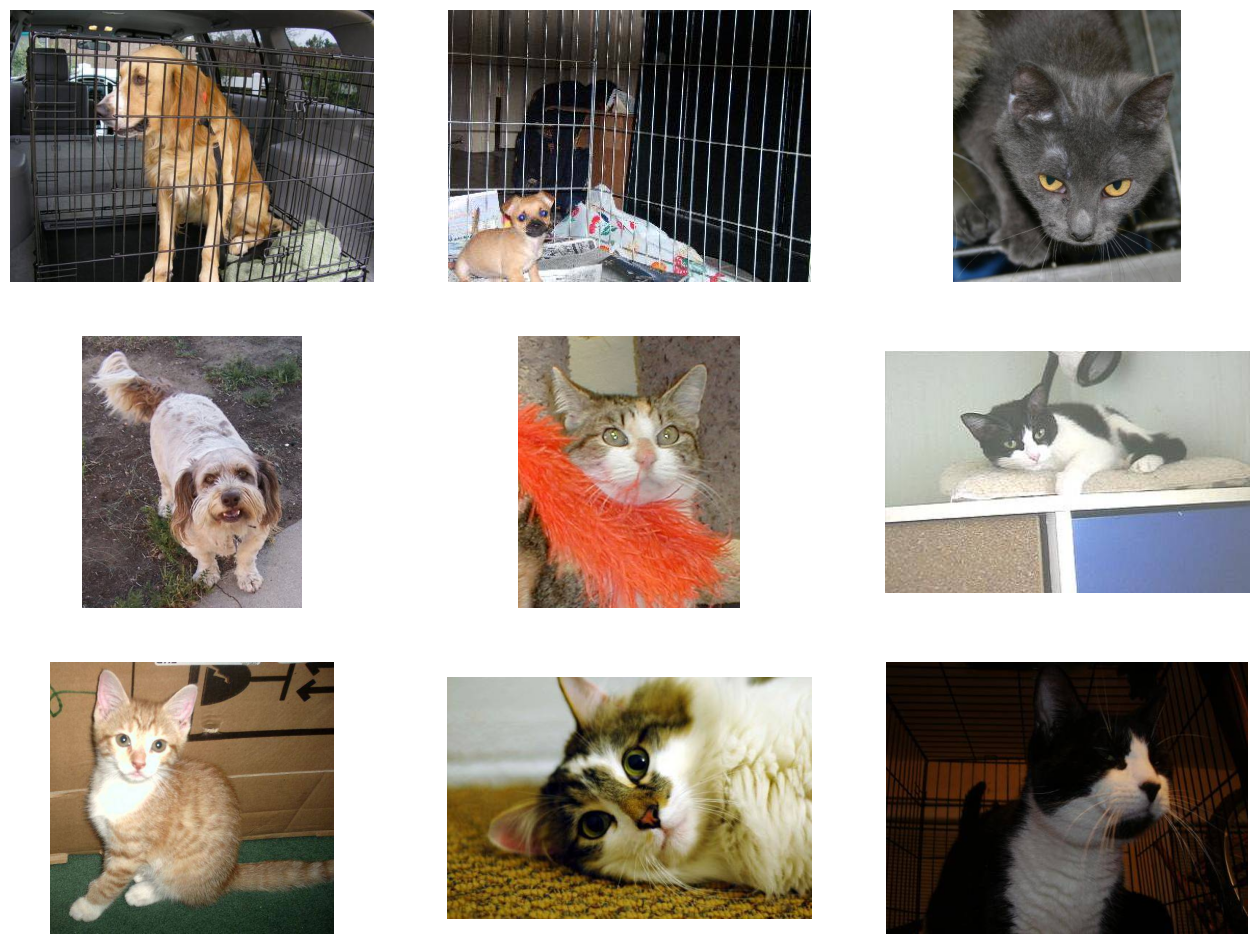

In [4]:
plt.figure(figsize=(16,12))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(img[i])
    plt.axis('off')

In [6]:
for im in imagenes:
    img_path = os.path.join(data_dir,im)
    if 'dog' in im:
        mv_path = os.path.join(data_dir,'dog',im)
    else:
        mv_path= os.path.join(data_dir,'cat',im)
    os.system('mv '+img_path+' '+mv_path)

mv: cannot move '../data/raw/train/dog' to a subdirectory of itself, '../data/raw/train/dog/dog'
mv: cannot move '../data/raw/train/cat' to a subdirectory of itself, '../data/raw/train/cat/cat'


In [7]:
from keras.preprocessing.image import ImageDataGenerator

dir_train = '../data/raw/train/'
dir_test = '../data/raw/'
image_size = (200,200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

data_train = datagentrain.flow_from_directory(
    dir_train,
    target_size = image_size,
    classes = ['dog','cat']
)

data_test = datagentest.flow_from_directory(
    dir_test,
    target_size = image_size,
    classes = ['test1']
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
